In [1]:
import pandas as pd
from collections import defaultdict
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import plotly

import greykite
from greykite.common.data_loader import DataLoader
from greykite.framework.templates.autogen.forecast_config import ForecastConfig, ComputationParam, ModelComponentsParam
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results

from fbprophet import Prophet

## peyton_manning

In [2]:
# Loads dataset into pandas DataFrame
dl = DataLoader()
df = dl.load_peyton_manning()

In [3]:
# specify dataset information
metadata = MetadataParam(
    time_col='ts',  # name of the time column ("date" in example above)
    value_col='y',  # name of the value column ("sessions" in example above)
    freq='D'# "H" for hourly, "D" for daily, "W" for weekly, etc.
                # Any format accepted by `pandas.date_range`
)

### SILVERKITE

In [4]:
forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
    df=df,
    config=ForecastConfig(
        model_template=ModelTemplateEnum.SILVERKITE.name,
        forecast_horizon=365,  # forecasts N steps ahead
        coverage=0.95,         # 95% prediction intervals
        metadata_param=metadata
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [5]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

In [6]:
forecast = result.forecast
fig = forecast.plot_components()
plotly.io.show(fig)     # fig.show() if you are using "PROPHET" template

In [7]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
    grid_search=grid_search,
    decimals=2,
    # The below saves space in the printed output. Remove to show all available metrics and columns.
    cv_report_metrics=None,
    column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"]
)
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                            []
rank_test_MAPE                     1
mean_test_MAPE                  7.31
split_test_MAPE    (5.02, 8.53, 8.4)
mean_train_MAPE                  4.2
split_train_MAPE  (3.82, 4.25, 4.54)
mean_fit_time                   8.46
mean_score_time                 0.59

### SILVERKITE(gradient_boosting)

In [8]:
forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
    df=df,
    config=ForecastConfig(
        model_template=ModelTemplateEnum.SILVERKITE.name,
        forecast_horizon=365,  # forecasts N steps ahead
        coverage=0.95,         # 95% prediction intervals
        metadata_param=metadata,
        model_components_param=ModelComponentsParam(
            custom=dict(fit_algorithm_dict=dict(fit_algorithm="gradient_boosting"))
        )
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [9]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

In [10]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
    grid_search=grid_search,
    decimals=2,
    # The below saves space in the printed output. Remove to show all available metrics and columns.
    cv_report_metrics=None,
    column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"]
)
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                             []
rank_test_MAPE                      1
mean_test_MAPE                  10.08
split_test_MAPE   (8.01, 7.54, 14.68)
mean_train_MAPE                   2.2
split_train_MAPE    (1.49, 2.51, 2.6)
mean_fit_time                    2.18
mean_score_time                  0.51

### PROPHET

In [11]:
forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
    df=df,
    config=ForecastConfig(
        model_template=ModelTemplateEnum.PROPHET.name,
        forecast_horizon=365,  # forecasts N steps ahead
        coverage=0.95,         # 95% prediction intervals
        metadata_param=metadata,
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

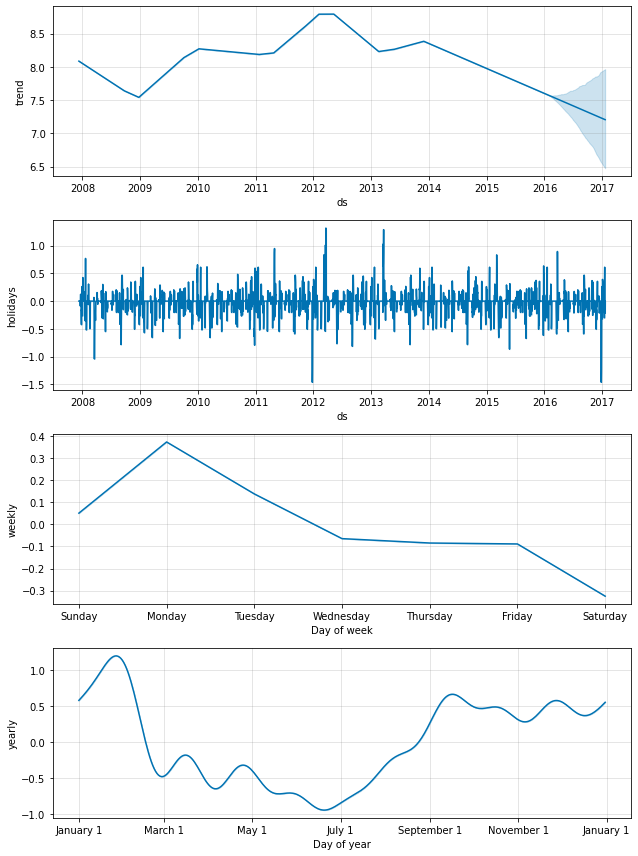

In [13]:
forecast = result.forecast
fig = forecast.plot_components()
fig.show()

In [14]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
    grid_search=grid_search,
    decimals=2,
    # The below saves space in the printed output. Remove to show all available metrics and columns.
    cv_report_metrics=None,
    column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"]
)
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                             []
rank_test_MAPE                      1
mean_test_MAPE                   7.39
split_test_MAPE   (11.21, 6.04, 4.92)
mean_train_MAPE                  3.34
split_train_MAPE    (2.58, 3.65, 3.8)
mean_fit_time                    5.52
mean_score_time                  3.47

## AirPassengers

In [15]:
df = pd.read_csv('../data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])

In [16]:
# specify dataset information
metadata = MetadataParam(
    time_col="Month",  # name of the time column ("date" in example above)
    value_col="#Passengers",  # name of the value column ("sessions" in example above)
    freq="MS"# "H" for hourly, "D" for daily, "W" for weekly, etc.
                # Any format accepted by `pandas.date_range`
)

### SILVERKITE

In [17]:
forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
    df=df,
    config=ForecastConfig(
        model_template=ModelTemplateEnum.SILVERKITE.name,
        forecast_horizon=12,  # forecasts N steps ahead
        coverage=0.95,         # 95% prediction intervals
        metadata_param=metadata
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [18]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

In [19]:
forecast = result.forecast
fig = forecast.plot_components()
plotly.io.show(fig)     # fig.show() if you are using "PROPHET" template

In [20]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
 grid_search=grid_search,
 decimals=2,
 # The below saves space in the printed output. Remove to show all available metrics and columns.
 cv_report_metrics=None,
 column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                              []
rank_test_MAPE                       1
mean_test_MAPE                   11.19
split_test_MAPE   (12.89, 10.72, 9.98)
mean_train_MAPE                   8.99
split_train_MAPE  (6.73, 10.19, 10.06)
mean_fit_time                     4.02
mean_score_time                    0.4

### SILVERKITE(gradient_boosting)

In [21]:
forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
    df=df,
    config=ForecastConfig(
        model_template=ModelTemplateEnum.SILVERKITE.name,
        forecast_horizon=12,  # forecasts N steps ahead
        coverage=0.95,         # 95% prediction intervals
        metadata_param=metadata,
        model_components_param=ModelComponentsParam(
            custom=dict(fit_algorithm_dict=dict(fit_algorithm='gradient_boosting'))
        )
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [22]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

In [23]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
 grid_search=grid_search,
 decimals=2,
 # The below saves space in the printed output. Remove to show all available metrics and columns.
 cv_report_metrics=None,
 column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                               []
rank_test_MAPE                        1
mean_test_MAPE                    17.06
split_test_MAPE   (23.39, 10.72, 17.07)
mean_train_MAPE                    2.13
split_train_MAPE      (0.3, 2.97, 3.13)
mean_fit_time                      0.54
mean_score_time                    0.39

### PROPHET

In [24]:
forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
 df=df,
 config=ForecastConfig(
     model_template=ModelTemplateEnum.PROPHET.name,
     forecast_horizon=12,  # forecasts 365 steps ahead
     coverage=0.95,         # 95% prediction intervals
     metadata_param=metadata,
     model_components_param=ModelComponentsParam(
         seasonality=dict(seasonality_mode='multiplicative')
     )
 )
)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
backtest = result.backtest
fig = backtest.plot()
plotly.io.show(fig)

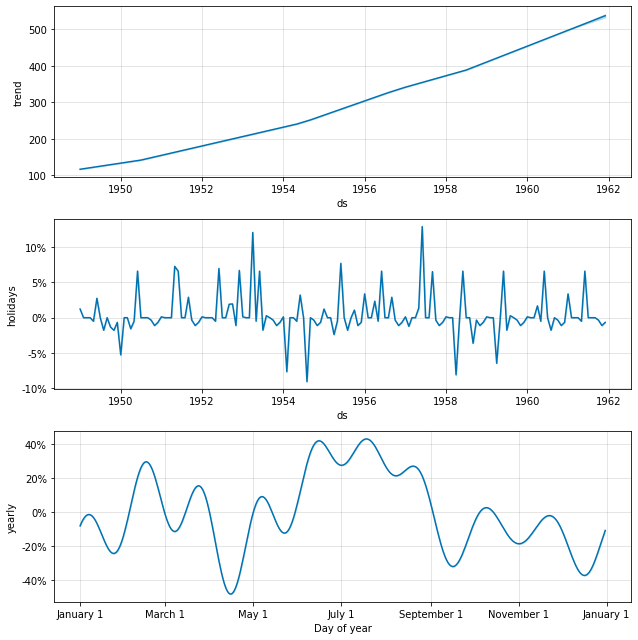

In [26]:
forecast = result.forecast
fig = forecast.plot_components()
#plotly.io.show(fig)     # fig.show() if you are using "PROPHET" template
fig.show()

In [27]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
 grid_search=grid_search,
 decimals=2,
 # The below saves space in the printed output. Remove to show all available metrics and columns.
 cv_report_metrics=None,
 column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                            []
rank_test_MAPE                     1
mean_test_MAPE                  7.28
split_test_MAPE   (7.24, 9.73, 4.87)
mean_train_MAPE                 2.44
split_train_MAPE  (3.14, 1.81, 2.37)
mean_fit_time                   1.77
mean_score_time                 1.99